[[-1.99999917  1.00000008  0.         ...  0.          0.
   0.        ]
 [ 1.00000008 -1.99999917  1.00000008 ...  0.          0.
   0.        ]
 [ 0.          1.00000008 -1.99999917 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -1.99999917  1.00000008
   0.        ]
 [ 0.          0.          0.         ...  1.00000008 -1.99999917
   1.00000008]
 [ 0.          0.          0.         ...  0.          1.00000008
  -1.99999917]]
[-1.00000008  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        

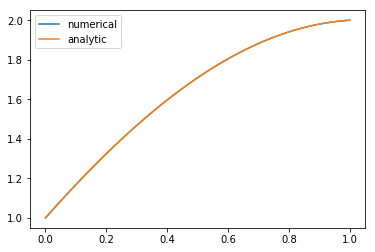

In [5]:
import math
import numpy as np
from scipy.linalg import solve, det, eig
import matplotlib.pyplot as plt

def g(x):
    return 1

def s(x):
    return 0

a = 0.0
b = 1.0
ya = 1.0
yb = 2.0
N = 1000

x = np.linspace(a, b, N+1)
h = (b-a)/N

xx = x[1:-1]		# N-1 interior points only: indices n = 0 to N-2

# Difference matrix A (dimension N-1).

A = np.zeros((N-1,N-1))

# Right-hand side r.
        
r = np.zeros(N-1)
r[0] = -ya*(1+h**2*g(a)/12)
r[-1] = -yb*(1+h**2*g(b)/12)

for n in range(N-1):
    A[n,n] = -2.0*(1 - 5*h**2*g(xx[n])/12)
    if n > 0:
        A[n,n-1] = 1.0 + h**2*g(xx[n-1])/12
    if n < N-2:
        A[n,n+1] = 1.0 + h**2*g(xx[n+1])/12

    r[n] += h**2*(s(x[n+2])+10*s(x[n+1])+s(x[n]))/12	# note use of x here

print(A)
print(r)

y0 = solve(A, r)

# Compare the results with the analytic solution.

yy0 = np.array([ya])
yy0 = np.append(yy0, y0)
yy0 = np.append(yy0, yb)
Alpha= (2-math.cos(1.0))/math.sin(1.0)
Beta = 1.0
yy1 = Alpha*np.sin(x) + Beta*np.cos(x)

plt.plot(x, yy0, label='numerical')
plt.plot(x, yy1, label='analytic')
print('maximum error =', np.max(np.abs(yy0-yy1)))
plt.legend(loc='best')
plt.show()

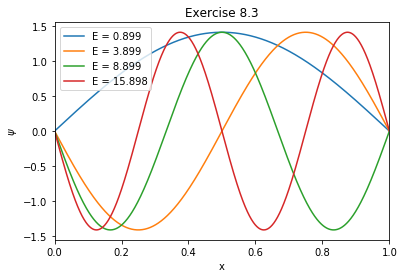

In [7]:
eigenvalues,eigenfunctions = eig(A)
iarr = np.argsort(-eigenvalues)		# list in ascending order

for i in iarr[:4]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2/np.pi**2
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))

plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='best')
plt.title('Exercise 8.3')
plt.show()

Inclass 8.3

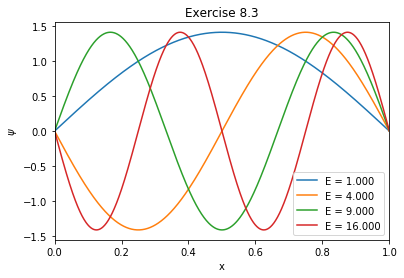

In [3]:
# Solve an eigenvalue ODE problem by matrix methods.

import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

def g(x):
    return 0.0

a = 0.0
b = 1.0
N = 1000

x = np.linspace(a, b, N+1)
h = (b-a)/N

# Difference matrix A (dimension N-1).

xx = x[1:-1]		# interior points only
A = np.zeros((N-1,N-1))
for n in range(N-1):
    A[n,n] = -2.0 + h**2*g(xx[n])
    if n > 0:
        A[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0

eigenvalues,eigenfunctions = eig(A)
iarr = np.argsort(-eigenvalues)		# list in ascending order

for i in iarr[:4]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2/np.pi**2
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))

plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='best')
plt.title('Exercise 8.3')
plt.show()